# Exploratory Data Analysis (EDA)

Exploratory analysis project on an e-commerce sales dataset.


## 1. Introduction

This project aims to analyze an e-commerce transaction dataset to understand sales trends, identify key patterns, and evaluate the quality of the available data.

## 2. Dataset Description

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("data/basket_details.csv")
df.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [3]:
df.shape

(15000, 4)

In [6]:
df.columns

Index(['customer_id', 'product_id', 'basket_date', 'basket_count'], dtype='str')

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   customer_id   15000 non-null  int64
 1   product_id    15000 non-null  int64
 2   basket_date   15000 non-null  str  
 3   basket_count  15000 non-null  int64
dtypes: int64(3), str(1)
memory usage: 468.9 KB


In [8]:
df.describe()

,customer_id,product_id,basket_count
count,1.500000e+04,1.500000e+04,15000.000000
mean,1.808567e+07,3.269771e+07,2.153733
std,1.233000e+07,1.629455e+07,0.517929
min,4.784000e+03,4.939000e+04,2.000000
25%,8.659327e+06,3.137412e+07,2.000000
50%,1.520775e+07,3.694759e+07,2.000000
75%,2.663904e+07,4.502408e+07,2.000000
max,4.460824e+07,5.579097e+07,10.000000


Il dataset contiene informazioni sulle transazioni di vendita, inclusi dettagli sui prodotti e le quantità. In questa fase iniziale vengono analizzate dimensioni, tipologia delle variabili e statistiche descrittive principali.

In [6]:
df.isnull().sum() #Missing value check

customer_id     0
product_id      0
basket_date     0
basket_count    0
dtype: int64

In [ ]:
df.duplicated().sum() #Duplicate check

np.int64(0)

In [5]:
df.describe(include="all") #Outliers check

,customer_id,product_id,basket_date,basket_count
count,1.500000e+04,1.500000e+04,15000,15000.000000
unique,NaN,NaN,31,NaN
top,NaN,NaN,2019-05-27,NaN
freq,NaN,NaN,1617,NaN
mean,1.808567e+07,3.269771e+07,NaN,2.153733
std,1.233000e+07,1.629455e+07,NaN,0.517929
min,4.784000e+03,4.939000e+04,NaN,2.000000
25%,8.659327e+06,3.137412e+07,NaN,2.000000
50%,1.520775e+07,3.694759e+07,NaN,2.000000
75%,2.663904e+07,4.502408e+07,NaN,2.000000


Ho effettuato controlli preliminari per individuare valori mancanti, duplicati e possibili anomalie nei dati, al fine di valutare la qualità complessiva del dataset.
Ho riscontrato che il dataset non ha nessun dato mancante, nessun duplicato e tutti i valori sembrano ragionevoli e inoltre, ho notato che la colonna "basket_count" ha pochi valori alti che possono però essere considerati come outlier naturali e non quindi come errori. L'unica anomalia da valutare è che la colonna "basket_date" è di tipo stringa e quindi sarebbe meglio convertirla in datetime per eventuali analisi temporali. 

## 3. Data Cleaning

In [37]:
df['basket_date'] = pd.to_datetime(df['basket_date'])
df['basket_date'].dtype


dtype('<M8[us]')

In this phase, I handled data types (especially dates) and verified the absence of missing values or duplicates. The dataset was found to be very clean, requiring only minor formatting.

## 4. Descriptive Statistics & Insights

In [12]:
df["basket_count"].sum() #Total units sold

np.int64(32306)

In [13]:
df["basket_count"].mean() #Average items per transaction

np.float64(2.1537333333333333)

In [9]:
top_products = ( #Top-selling products
    df.groupby("product_id")["basket_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

product_id
43524799    69
31516269    59
39833031    50
46130148    36
34913531    28
3735903     27
40276011    27
6411072     23
42033035    23
39050110    22
Name: basket_count, dtype: int64

In [14]:
top_customers = ( #Most active customers
    df.groupby("customer_id")["basket_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

customer_id
8276934     29
7097820     18
11082470    17
22988999    14
18617678    14
10871751    14
11732494    14
16074697    13
29145357    12
25854510    12
Name: basket_count, dtype: int64

In [38]:
weekly_volume = ( #Weekly sales analysis
    df.groupby(df["basket_date"].dt.to_period("W"))["basket_count"]
    .sum()
)
weekly_volume

basket_date
2019-05-20/2019-05-26    10434
2019-05-27/2019-06-02     9971
2019-06-03/2019-06-09     4528
2019-06-10/2019-06-16     5513
2019-06-17/2019-06-23     1860
Freq: W-SUN, Name: basket_count, dtype: int64

The exploratory analysis illustrates the distribution of sales volumes, with a specific focus on best-selling products, the most active customers, and temporal purchasing trends.

Since the dataset does not include pricing information, the analysis focuses exclusively on volumes.

## 5. Data Visualization

In [20]:
df["basket_date"] = pd.to_datetime(df["basket_date"])

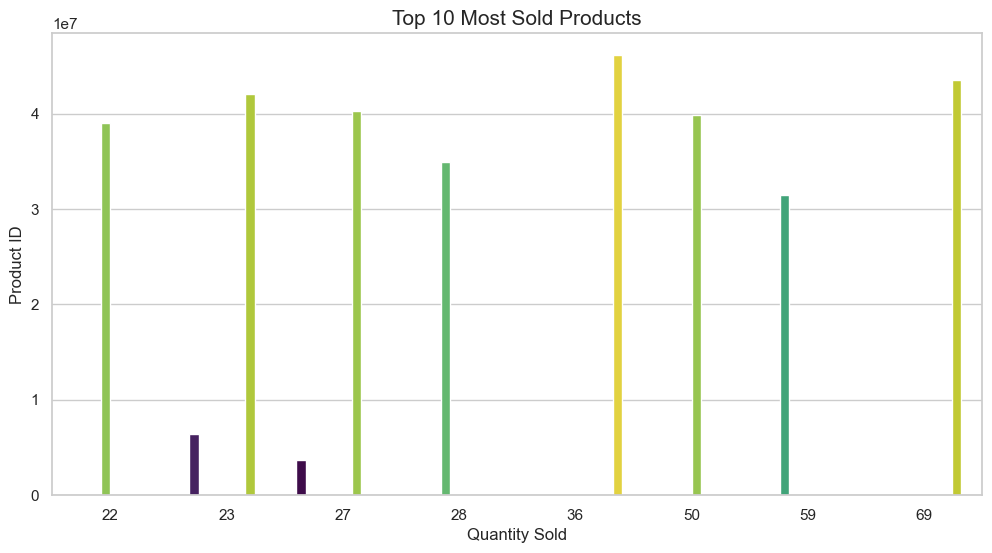

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))


sns.barplot(
    x=top_products.values, 
    y=top_products.index, 
    hue=top_products.index,   
    palette="viridis", 
    legend=False,             
    errorbar=None
)

plt.title("Top 10 Most Sold Products", fontsize=15)
plt.xlabel("Quantity Sold")
plt.ylabel("Product ID")
plt.show()

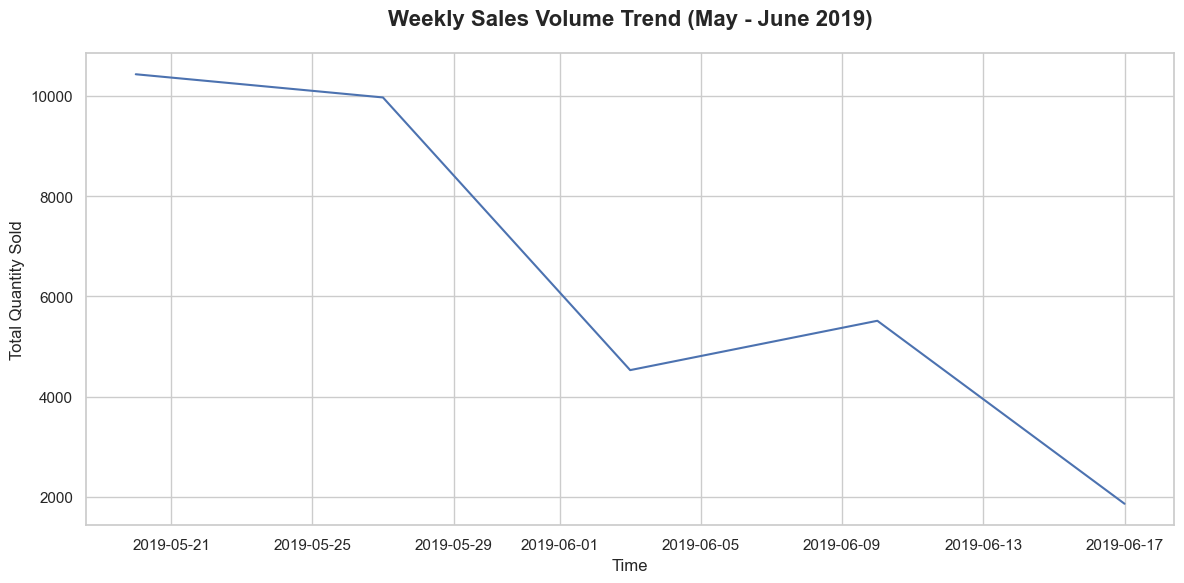

In [48]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(
    x=weekly_volume.index, 
    y=weekly_volume.values
)

plt.title("Weekly Sales Volume Trend (May - June 2019)", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=0) 


plt.tight_layout()
plt.show()

The sales trend highlights a steady and sharp decline throughout the analyzed period. The peak activity is recorded at the beginning, around May 21st, followed by a progressive and drastic reduction in volumes over the following weeks. This vertical drop suggests that the dataset may have captured the tail end of an exceptional event, such as a liquidation sale or a seasonal stock clearance. If this is not due to a data logging error, it indicates a very rapid loss of commercial traction within just a few weeks.

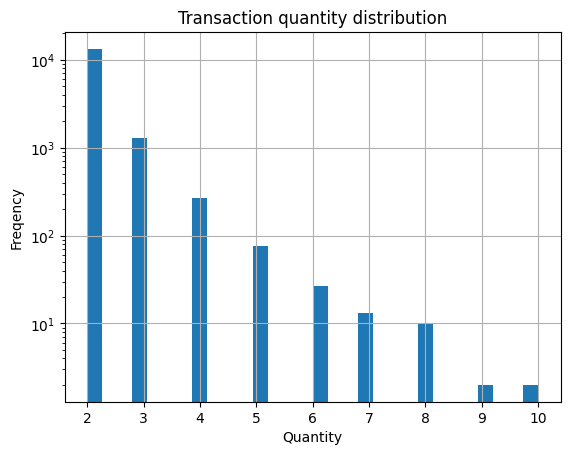

In [29]:
df["basket_count"].hist(bins=30, log= "True") 
plt.title("Transaction quantity distribution")
plt.xlabel("Quantity")
plt.ylabel("Freqency")
plt.show()

The vast majority of purchases are concentrated at the minimum threshold of 2 units, with frequency dropping sharply as the quantity per transaction increases. This confirms the hypothesis that the business operates on standardized orders and small batches. 

## 6. Conclusions

At the conclusion of this e-commerce dataset analysis, several interesting points emerge. Even without pricing data, the sales volumes provide significant insights into customer purchasing behavior.

The final analysis reveals critical insights that warrant further investigation. While the dataset is technically clean, the time series shows a sharp collapse in sales volumes following the peak around May 21st, with June activity dropping to nearly half of May's levels. This suggests the business might have experienced a liquidation phase or a critical stock-out event. Furthermore, the distribution analysis (histogram) confirms a non-retail pattern: most orders are strictly concentrated at the 2-unit minimum, pointing towards a wholesale or pre-aggregated model, with only rare high-volume outliers forming a 'long tail' in the data.

In conclusion, this project demonstrates that even by analyzing only quantities and dates, it is possible to obtain a clear profile of purchasing habits and the overall business structure.